# Неустойчивые орбиты вокруг точки L1
в круговой ограниченной задаче трех тел

### Условие задачи


**Дано:**
- движение невесомого тела в системе из двух массивных тел, вращающихся относительно общего центра масс, описывается системой уравнений:

$\begin{cases}
\ddot{x} - 2\dot{y} = \frac{\partial{U}}{\partial{x}} \\
\ddot{y} + 2\dot{x} = \frac{\partial{U}}{\partial{y}} \\
\ddot{z} = \frac{\partial{U}}{\partial{z}} \\
U = \frac{1}{2} (x^2 + y^2) + \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2} \\
r^2_1 = (x + \mu_2)^2 + y^2 + z^2 \\
r^2_2 = (x - \mu_1)^2 + y^2 + z^2
\end{cases}$

- константы модели для системы Солнце-Земля:
    - $\mu_2 = 3.001348389698916e-06$

- методы Рунге-Кутты для интегрирования систем ОДУ первого порядка, рассмотренные на семинарах
- алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг L1, рассмотренный на семинаре
- библиотека математических алгоритмов [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- модули `numba`, `numpy`, `matplotlib`


**Требуется:**
1. Реализовать обобщенный метод Рунге-Кутты на основе таблицы Бутчера для интегрирования систем ОДУ первого порядка

    - функция для расчета одного шага размера $h$
    - функция для расчета $n$ шагов размера $h$ (1)
    - подготовить таблицу Бутчера для интегратора 5 порядка (см. Tracker Component Library)


2. Реализовать алгоритм вычисления начальной скорости для неустойчивой орбиты вокруг L1:

    - модификация функции (1) для досрочной остановки интегрирования при условии пересечения одной из плоскостей
    - функция для расчета начальной скорости $vy_0$ на основе метода бисекции для орбиты, заданной начальным положением $(x_0, 0, z_0)$ и условием ортогональности вектора скорости и плоскости $XOZ$ в начальный момент времени
    
        - $d_p = 1.4$ млн. км.
        - $x_{left} = x_{L1} - d_p$ - координата левой плоскости, заданной уравнением $x = x_{left}$
        - $x_{right} = x_{L1} + d_p$ - координата правой плоскости, заданной уравнением $x = x_{right}$


3. Реализовать алгоритм вычисления начальных скоростей орбит, начальные состояния которых заданы на решетке:
    - $(x_0, z_0) \in [x_{min}, x_{max}] \times [z_{min}, z_{max}]$

        - $d_g = 1.0$ млн. км.
        - $x_{min} = x_{L1} - d_g / 2$
        - $x_{max} = x_{L1} + d_g / 2$
        - $z_{min} = 0.0$
        - $z_{max} = d_g$

    - количество узлов на решетке $N \times N$


4. Использовать `@njit`, `@cfunc`, `prange` из модуля `numba` для компиляции всех функций и распараллеливания функции расчета на решетке


5. Вычислить начальные скорости и константы Якоби на заданных решетках
    - $J = 2 U - v^2$ - формула для вычисления константы Якоби
    - $h = 0.01721420632103996$ - шаг по времени `t`, равен 1 суткам в берзармерных единицах
    - $x_{L1}$ - координата точки L1 (см. материалы семинара)
    - $R = 149.6$ млн. км. - среднее расстояние Солнце-Земля
    - $[-0.1, 0.1]$ - начальный отрезок для уточнения скоростей методом бисекции


6. Измерить время вычислений


7. Сохранить результаты вычислений в файлах `*.npy` (функцией `np.save`)


8. Построить цветовые карты рассчитанных величин:

    - засечки по осям должны соответствовать координатам $x, z$, где $x$ отсчитывается относительно $x_{L1}$
    - единицы измерений по осям - километры
    - оси должны быть подписаны
    - должен присутствовать `colorbar`
    - должен присутствовать заголовок рисунка


9. Задокументировать все реализованные функции


**Материалы:**
- [Методы Рунге-Кутты](https://ru.wikipedia.org/wiki/Метод_Рунге_—_Кутты)
- [Динамика Солнечной Системы](https://disk.yandex.ru/i/HfJaUW2Sm62td)
- [Tracker Component Library](https://github.com/USNavalResearchLaboratory/TrackerComponentLibrary/blob/master/Mathematical_Functions/Differential_Equations/RungeKStep.m)
- [Mapping of initial conditions for libration point orbits](https://www.dropbox.com/s/wafy1jaylclngbv/Aksenov_ASR.pdf?dl=0)


**Рекомендации:**
- использовать IDE **Pycharm** (полная версия для студентов и преподавателей)


**Бонусная задача:**
- выполнить расчеты для $d_g = 2$ млн. км и решетки размером $640 \times 640$ и построить цветовые карты согласно пункту 8
- для этой решетки часть орбит не может быть расчитана рассмотренным методом, поэтому необходимо корректно обработать такие случаи


**Правила оценивания:**

- оценка за корректно выполненные расчеты на решетке размером $(N, N)$:
```
      i  =  1   2    3    4
    N(i) = 40  80  160  320
    g(i) =  1  16   33   50
```
    
- штрафы $p(j)$, баллов:
    - нет цветовых карт - 20
    - не сохранены файлы с результатами вычислений - 20
    - нет документации функций - 20
    - не измерено время вычислений - 10
    - менее значимые недоработки - 10
    
    
- бонусы $b(k)$, баллов
    - выполнена бонусная задача - 20
    

- итоговая оценка за задание = $\sum_{i}g(i) - \sum_{j}{p(j)} + \sum_{k}{b(k)}$

In [1]:
import numpy as np
from runge_kutta_crtbp import get_v0_over_grid, crtbp_ode
from numba import njit, cfunc, prange
from time import time
import matplotlib.pyplot as plt

Введём таблицу бутчера 5-го порядка из Tracker Component Library (5,0)

In [2]:
A = np.array([[0,         0,          0,          0,          0,              0,    0],
              [1/5,       0,          0,          0,          0,              0,    0],
              [3/40,      9/40,       0,          0,          0,              0,    0],
              [44/45,     -56/15,     32/9,       0,          0,              0,    0],
              [19372/6561,-25360/2187,64448/6561, -212/729,   0,              0,    0],
              [9017/3168, -355/33,    46732/5247, 49/176,     -5103/18656,    0,    0],
              [35/384,    0,          500/1113,   125/192,    -2187/6784,     11/84,0]])
c = np.array([0, 1/5, 3/10, 4/5, 8/9, 1, 1])
b = np.array([35/384, 0, 500/1113, 125/192, -2187/6784, 11/84, 0])

ButcherTab = (A, b, c)

In [2]:
mu2 = 3.001348389698916e-06
mu1 = 1 - mu2
R = 149600000
xL1 = 0.9900289479871318
d_p = 1400000. / R
d_g = 1000000. / R
h = 0.01721420632103996
mc = np.array([mu2])

Запускаем программы

In [8]:
N = 40
vs = np.array([-0.1, 0.1])
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)
pl = np.array([xL1 - d_p, xL1 + d_p])

start = time()
np.save('result_N40.npy', get_v0_over_grid(xs, zs, vs, crtbp_ode, h, ButcherTab, mc, pl))
print('calc_time is', round(time() - start, 4), 's')

calculations took 386.5121 s


In [9]:
N = 80
vs = np.array([-0.1, 0.1])
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)
pl = np.array([xL1 - d_p, xL1 + d_p])

start = time()
np.save('result_N80.npy', get_v0_over_grid(xs, zs, vs, crtbp_ode, h, ButcherTab, mc, pl))
print('calc_time is', round(time() - start, 4), 's')

calculations took 1486.5481 s


In [10]:
N = 160
vs = np.array([-0.1, 0.1])
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)
pl = np.array([xL1 - d_p, xL1 + d_p])

start = time()
np.save('result_N160.npy', get_v0_over_grid(xs, zs, vs, crtbp_ode, h, ButcherTab, mc, pl))
print('calc_time is', round(time() - start, 4), 's')

calculations took 6317.1953 s


In [11]:
N = 320
vs = np.array([-0.1, 0.1])
xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
zs = np.linspace(0., d_g, N)
pl = np.array([xL1 - d_p, xL1 + d_p])

start = time()
np.save('result_N320.npy', get_v0_over_grid(xs, zs, vs, crtbp_ode, h, ButcherTab, mc, pl))
print('calc_time is', round(time() - start, 4), 's')

calculations took 24034.5136 s


Выводим графики

In [10]:
def plot_results(N):
    """
    расчёт констант Якоби для решётки со стороной N и вывод
    графиков нач. скоростей и констант Якоби
    """

    v0 = np.load(f'result_N{N}.npy')
    plt.imshow(v0.T, extent=np.array([- d_g / 2, d_g / 2, 0., d_g]) * R)
    plt.title('начальная скорость v0')
    plt.xlabel('x - xL1, км.')
    plt.ylabel('z, км.')
    plt.colorbar()
    plt.show()
    
    J = np.empty((N,N))
    xs = np.linspace(xL1 - d_g / 2, xL1 + d_g / 2, N)
    zs = np.linspace(0., d_g, N)
    for i in range(N):
        for j in range(N):
            r1 = np.sqrt((xs[i] + mu2) ** 2 + zs[j] ** 2)
            r2 = np.sqrt((xs[i] - mu1) ** 2 + zs[j] ** 2)
            U = xs[i] ** 2 / 2 + mu1 / r1 + mu2 / r2
            J[i,j] = 2 * U - v0[i,j] ** 2
    
    plt.imshow(J.T, extent=np.array([- d_g / 2, d_g / 2, 0., d_g]) * R)
    plt.title('константа Якоби J')
    plt.xlabel('x - xL1, км.')
    plt.ylabel('z, км.')
    plt.colorbar()
    plt.show()

ValueError: 'virigis' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

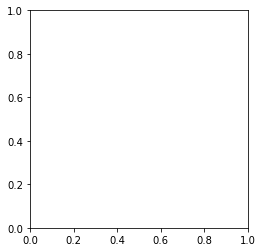

In [11]:
plot_results(40)

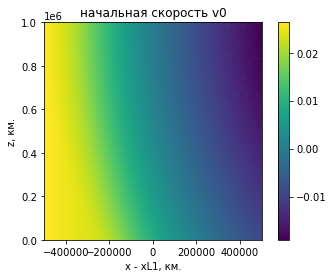

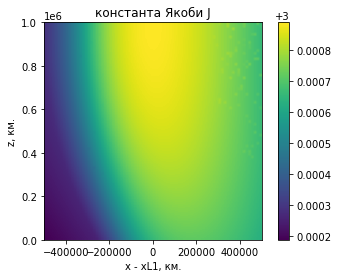

In [7]:
plot_results(80)

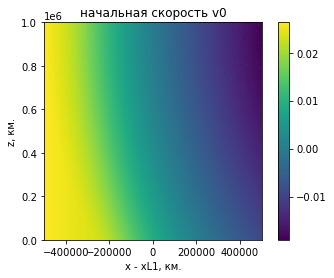

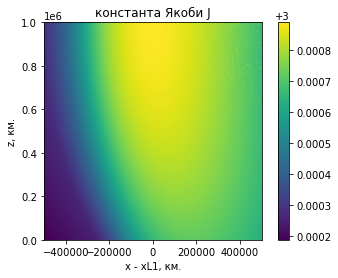

In [8]:
plot_results(160)

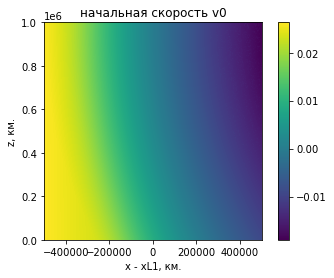

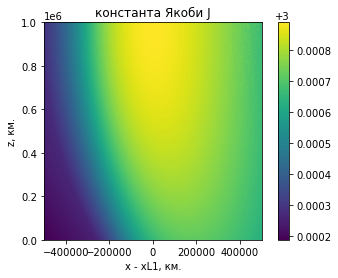

In [9]:
plot_results(320)